# Pairs Trading- finding pairs based on Clustering

## Pairs Trading:

Pairs trading is a form of mean-reversion that has a distinct advantage of always being hedged against market movements. It is generally a high alpha strategy when backed up by some rigorous statistics. The stratey is based on mathematical analysis.The prinicple is as follows. Let's say you have a pair of securities X and Y that have some underlying economic link. An example might be two companies that manufacture the same product, or two companies in one supply chain. If we can model this economic link with a mathematical model, we can make trades on it.

In [59]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import yfinance as yf

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Data and Scarping Nifty 50 Ticker Symbols:

In [60]:
df = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[1]
df

,Company Name,Symbol,Sector
0,Adani Enterprises,ADANIENT,Metals
1,Adani Ports & SEZ,ADANIPORTS,Infrastructure
2,Apollo Hospitals,APOLLOHOSP,Healthcare
3,Asian Paints,ASIANPAINT,Consumer Durables
4,Axis Bank,AXISBANK,Banking
5,Bajaj Auto,BAJAJ-AUTO,Automobile
6,Bajaj Finance,BAJFINANCE,Financial Services
7,Bajaj Finserv,BAJAJFINSV,Financial Services
8,Bharti Airtel,BHARTIARTL,Telecommunication
9,Bharat Petroleum,BPCL,Energy - Oil & Gas


In [61]:
df["tickers"] = df["Symbol"].astype(str) + ".NS"
df

,Company Name,Symbol,Sector,tickers
0,Adani Enterprises,ADANIENT,Metals,ADANIENT.NS
1,Adani Ports & SEZ,ADANIPORTS,Infrastructure,ADANIPORTS.NS
2,Apollo Hospitals,APOLLOHOSP,Healthcare,APOLLOHOSP.NS
3,Asian Paints,ASIANPAINT,Consumer Durables,ASIANPAINT.NS
4,Axis Bank,AXISBANK,Banking,AXISBANK.NS
5,Bajaj Auto,BAJAJ-AUTO,Automobile,BAJAJ-AUTO.NS
6,Bajaj Finance,BAJFINANCE,Financial Services,BAJFINANCE.NS
7,Bajaj Finserv,BAJAJFINSV,Financial Services,BAJAJFINSV.NS
8,Bharti Airtel,BHARTIARTL,Telecommunication,BHARTIARTL.NS
9,Bharat Petroleum,BPCL,Energy - Oil & Gas,BPCL.NS


In [62]:
tickers = df.tickers.to_list()
tickers

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS']

In [63]:
start = "2015-01-01"
end = "2022-11-21"
dataset = pd.DataFrame()
for stock_name in tickers:
    # daily data
    dataset[stock_name] = yf.download(stock_name,start,end)['Adj Close'] 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

##  Exploratory Data Analysis:

### Descriptive Statistics 

In [64]:
dataset.shape

(1946, 50)

In [65]:
dataset.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TATACONSUM.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,70.727554,306.589447,1093.238403,709.613831,488.252930,1965.861084,342.820038,128.114197,319.925201,137.601242,...,780.251221,492.960724,14.594915,1097.644043,135.846252,531.273376,363.138031,2591.174805,209.274780,195.379028
2015-01-02,71.073990,306.397583,1095.131958,734.146912,499.171997,1965.540283,337.339325,127.023857,321.820618,135.539948,...,784.094360,506.163696,14.822251,1112.261475,137.468826,533.873901,366.006439,2668.642578,215.799301,197.112076
2015-01-05,72.250374,310.667114,1098.773071,734.099548,502.326416,1972.715088,336.457764,125.336037,314.679779,135.802887,...,784.568970,518.031555,15.036964,1095.358398,137.874466,524.966614,368.970428,2674.092285,211.786575,197.465790
2015-01-06,71.701874,308.796204,1066.050537,716.575867,484.370544,1957.323242,335.585907,122.438400,312.211365,134.435730,...,767.297424,495.878235,14.308031,1054.976685,133.547607,519.335510,356.349518,2599.057861,201.525024,192.850143
2015-01-07,71.066780,308.076599,1074.401001,730.973633,483.982300,1961.892822,342.418396,122.333839,312.960724,135.655640,...,768.483765,488.411377,14.033776,1042.514526,133.818024,516.908997,358.166199,2588.790527,197.910461,191.382294


In [66]:
dataset.describe()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TATACONSUM.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,529.067479,425.291719,1965.944120,1652.341656,594.951352,2669.721466,3035.737433,705.947246,433.228274,298.780692,...,636.990507,336.122714,28.036980,1954.219979,345.196552,680.149695,1056.830029,4415.311915,496.994959,293.047953
std,844.638806,187.035383,1243.658738,839.966350,123.614818,612.361266,2261.422717,478.198900,150.460341,72.946443,...,176.205750,138.369616,22.421072,890.798871,243.933240,321.672273,695.109604,1406.239578,155.092632,139.218937
min,31.047003,165.861679,913.006287,661.684204,302.689240,1562.210938,335.585907,122.333839,256.974396,134.435730,...,316.685699,65.300003,7.481126,941.055176,94.058685,315.636230,293.798187,2535.896484,197.910461,159.617538
25%,62.660408,308.320198,1191.902679,1024.802704,500.196709,2274.045776,1048.169891,316.250328,314.981392,258.285858,...,484.782288,184.724998,14.229698,1123.309418,137.272289,429.384850,401.793083,3493.675110,392.734772,200.437565
50%,132.899185,360.524658,1332.959778,1331.714172,562.647034,2496.061157,2441.540283,589.841949,363.468277,303.910660,...,613.158661,360.227051,20.124860,1826.179688,251.457031,592.411713,908.223572,3994.373291,479.394012,230.656921
75%,426.910034,431.565918,2348.536865,2237.502380,715.698090,3010.726685,4755.931641,929.275986,532.387863,351.522438,...,788.462311,448.162506,28.175471,2711.094788,549.809219,847.477493,1374.863739,4871.377808,591.102478,351.585068
max,4057.800049,970.250000,5718.302734,3565.504639,915.150024,4091.149902,7900.533203,1906.968140,846.150024,443.271271,...,1109.641846,597.892273,113.000000,3964.502930,875.051575,1749.771362,2769.699951,8167.166016,831.680420,714.380005


### Data Preprocessing:

In [67]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [68]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

In [69]:
missing_fractions

HDFCLIFE.NS      0.364851
SBILIFE.NS       0.348407
ADANIENT.NS      0.000000
RELIANCE.NS      0.000000
JSWSTEEL.NS      0.000000
KOTAKBANK.NS     0.000000
LT.NS            0.000000
M&M.NS           0.000000
MARUTI.NS        0.000000
NESTLEIND.NS     0.000000
NTPC.NS          0.000000
ONGC.NS          0.000000
POWERGRID.NS     0.000000
SBIN.NS          0.000000
INFY.NS          0.000000
SUNPHARMA.NS     0.000000
TATAMOTORS.NS    0.000000
TATASTEEL.NS     0.000000
TCS.NS           0.000000
TATACONSUM.NS    0.000000
TECHM.NS         0.000000
TITAN.NS         0.000000
ULTRACEMCO.NS    0.000000
UPL.NS           0.000000
ITC.NS           0.000000
INDUSINDBK.NS    0.000000
ADANIPORTS.NS    0.000000
ICICIBANK.NS     0.000000
APOLLOHOSP.NS    0.000000
ASIANPAINT.NS    0.000000
AXISBANK.NS      0.000000
BAJAJ-AUTO.NS    0.000000
BAJFINANCE.NS    0.000000
BAJAJFINSV.NS    0.000000
BHARTIARTL.NS    0.000000
BPCL.NS          0.000000
BRITANNIA.NS     0.000000
CIPLA.NS         0.000000
COALINDIA.NS

In [70]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(1946, 48)

## Evaluating Clustering Algorithms and Models:

We will look at the following models:

1. KMeans
2. Hierarchical Clustering (Agglomerative Clustering)
3. Affinity Propagation

In [71]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(5)

,Returns,Volatility
ADANIENT.NS,4.264780,3.027165
ADANIPORTS.NS,0.051718,0.686191
APOLLOHOSP.NS,0.371091,0.377109
ASIANPAINT.NS,0.245139,-0.842996
AXISBANK.NS,-0.554287,0.629747


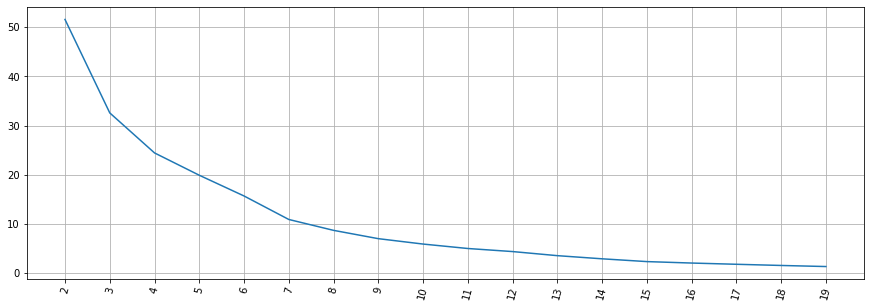

In [73]:
distorsions = []
max_loop= 20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

Inspecting the sum of squared errors chart, it appears the elbow “kink” occurs 6 or 7 clusters for this data. Certainly, we can see that as the number of clusters increase pass 7, the sum of square of errors within clusters plateaus off.

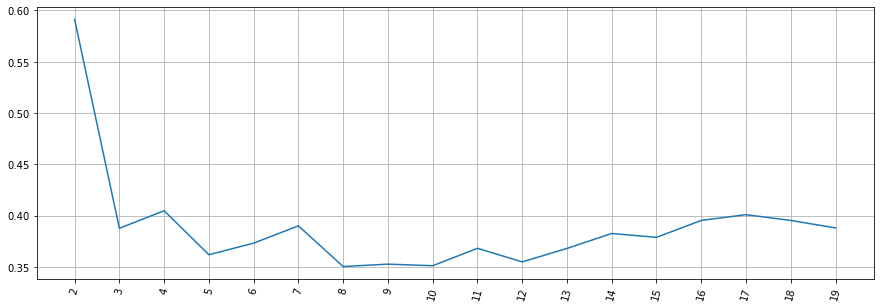

In [74]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

From the silhouette score chart, we can see that there are various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would prefer 6 clusters in the K-means model.

### Clustering and Visualisation
Let us build the k-means model with six clusters and visualize the results.

In [75]:
nclust=7
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [76]:
#Extracting labels 
target_labels = k_means.predict(X)

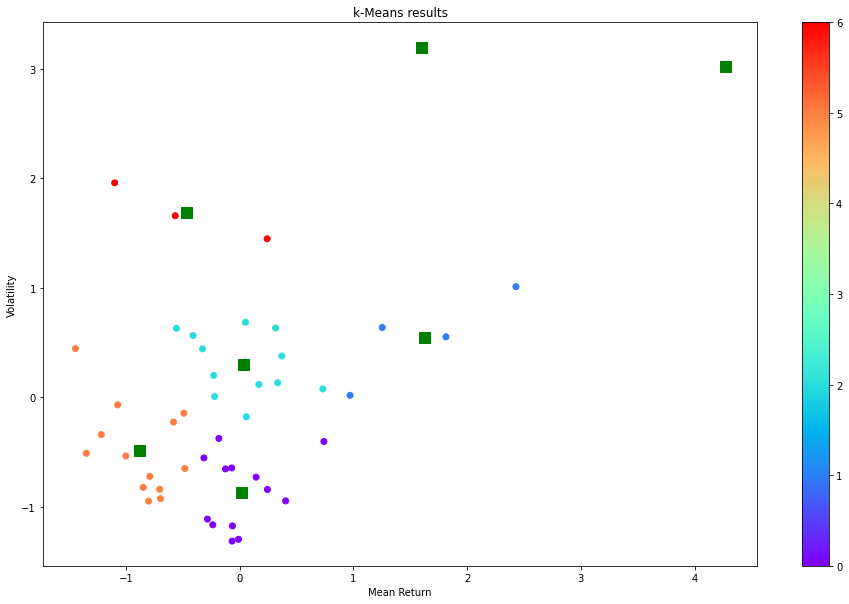

In [77]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

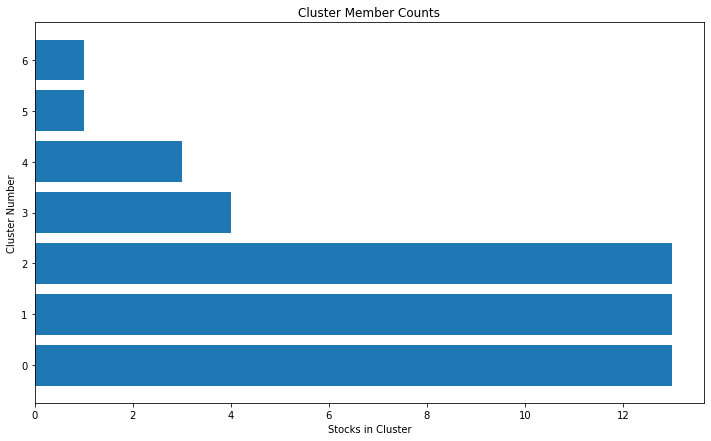

In [78]:
# show number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), # cluster labels, y axis
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

The number of stocks in a cluster range from around 1 to 13. Although, the distribution is not equal, we have significant number of stocks in each cluster.

### Hierarchical Clustering (Agglomerative Clustering)

In the first step we look at the hierarchy graph and check for the number of clusters

#### Building Hierarchy Graph/ Dendogram

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([17.        , 28.        ,  0.05510802,  2.        ])

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

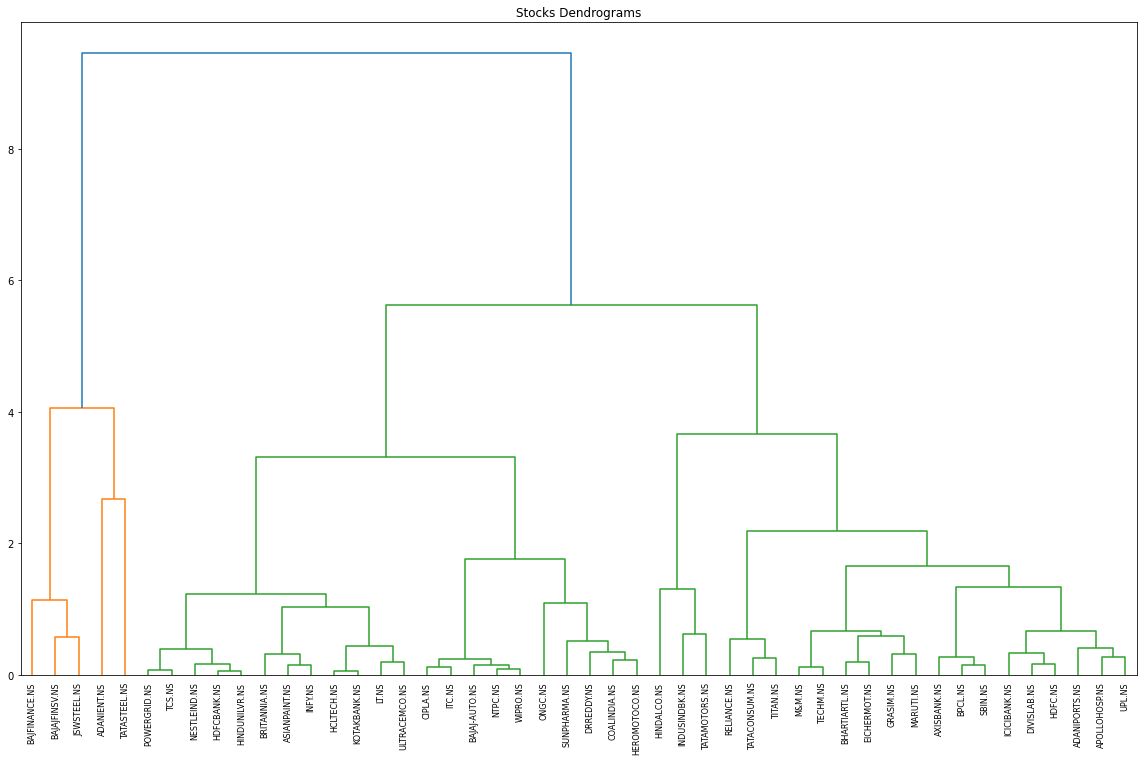

In [80]:
#Plot Dendogram
plt.figure(figsize=(20, 12))
plt.title("Stocks Dendrograms")
dendrogram(Z,labels = X.index)
plt.show()

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. Then we select the distance threshold to cut the dendrogram to obtain the selected clustering level. The output is the cluster labelled for each row of data. As expected from the dendrogram, a cut at 5 gives us four clusters.

In [81]:
distance_threshold = 5
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([1, 3, 2])

### Clustering and Visualisation:

In [82]:
nclust = 3
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)

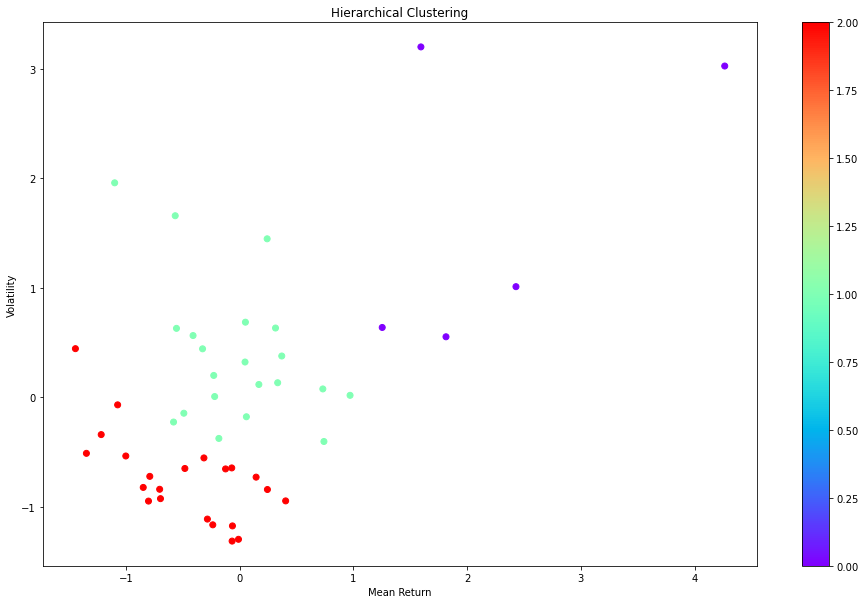

In [83]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

### Affinity Propagation:

In [84]:
ap = AffinityPropagation(verbose=True)
ap.fit(X)
clust_labels2 = ap.predict(X)

Converged after 21 iterations.


ValueError: ndarray is not C-contiguous

NameError: name 'clust_labels2' is not defined

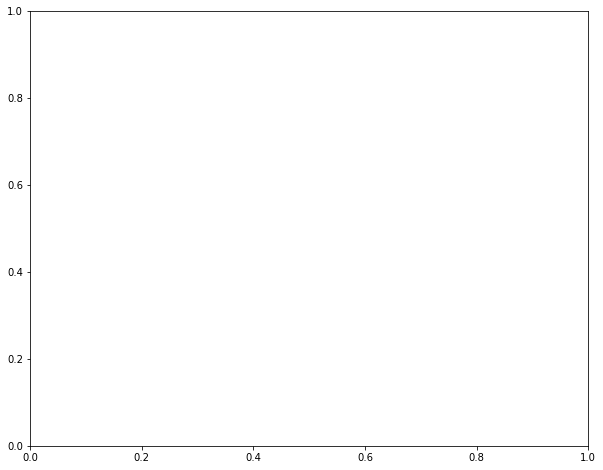

In [85]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

### Cluster Visualisation

Estimated number of clusters: 9


<Figure size 432x288 with 0 Axes>

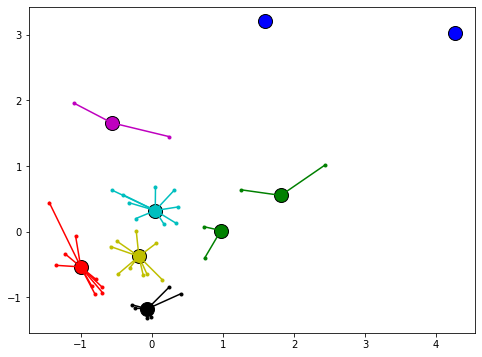

In [86]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

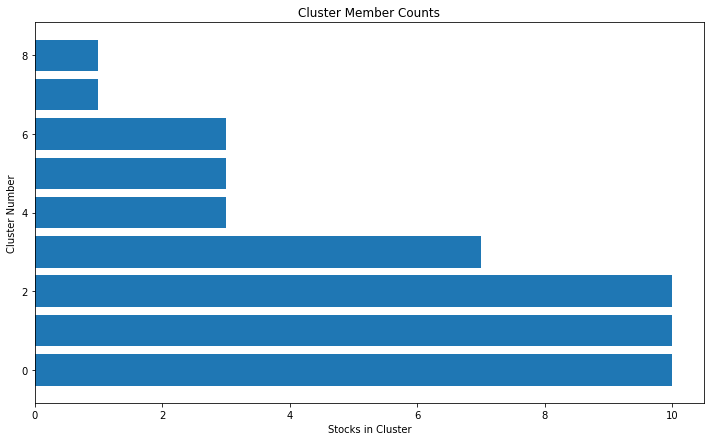

In [87]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), # cluster labels, y axis
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

###  Cluster Evaluation:

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

In [88]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.3855437462413698
hc 0.33942359356369795
ap 0.34941411349172685


AS Kmean Clustering performs the best, we use the clustering results of K means and use 7 clusters as specified by this method

### Visualising the return within a cluster:

In [89]:
# all stock with its cluster label (including -1)
clustered_series = pd.Series(index=X.index, data=k_means.fit_predict(X).flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1]

In [90]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

[1, 3, 4, 0, 2]

In [91]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 5
Pairs to evaluate: 506


In [92]:
# plot a handful of the smallest clusters
plt.figure(figsize=(12,7))
cluster_vis_list[0:min(len(cluster_vis_list), 5)]

[1, 3, 4, 0, 2]

<Figure size 864x504 with 0 Axes>

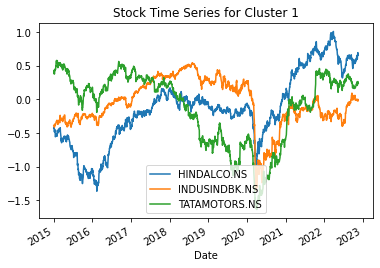

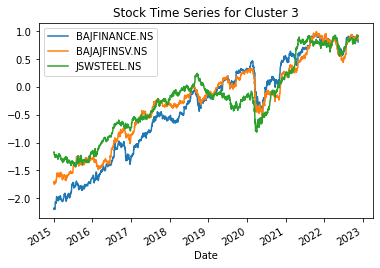

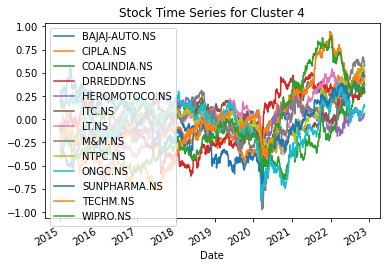

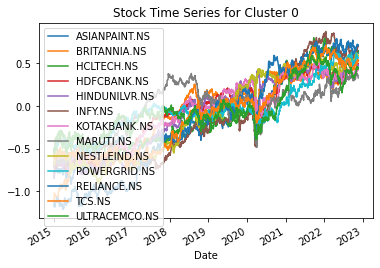

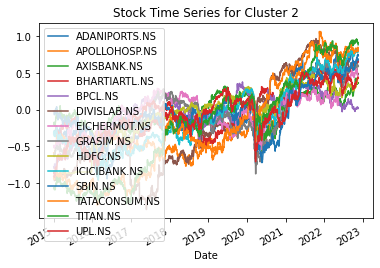

In [93]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 5)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(dataset.loc[:, tickers].mean())
    data = np.log(dataset.loc[:, tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
plt.show()

Looking at the charts above, across all the clusters with small number of stocks, we see similar movement of the stocks under different clusters, which corroborates the effectiveness of the clustering technique.

## Pair Selection:

### Cointegration and Pair Selection Function

In [94]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [95]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        dataset[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [96]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [97]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 6
In those pairs, there are 8 unique tickers.


In [98]:
pairs

[('ADANIPORTS.NS', 'ICICIBANK.NS'),
 ('ADANIPORTS.NS', 'SBIN.NS'),
 ('ASIANPAINT.NS', 'HCLTECH.NS'),
 ('ASIANPAINT.NS', 'INFY.NS'),
 ('ASIANPAINT.NS', 'RELIANCE.NS'),
 ('ASIANPAINT.NS', 'TCS.NS')]

### Pair Visualization

In [100]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [101]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [102]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

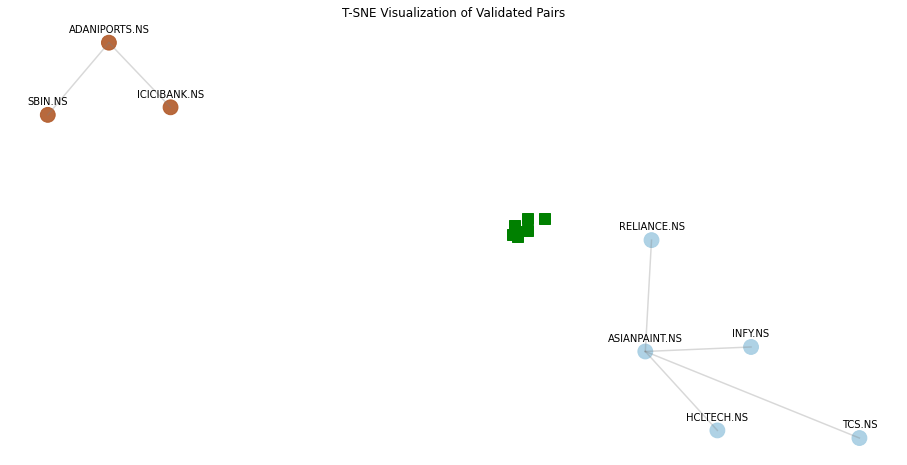

In [103]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

## Cointegration tests and Calculating the Spread:

Now we can plot the spread of the two time series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities.

In [104]:
S1 = dataset['ADANIPORTS.NS']
S2 = dataset['ICICIBANK.NS']

score, pvalue, _ = coint(S1, S2)
pvalue

0.021978313312418996

In [105]:
S3 = dataset['ADANIPORTS.NS']
S4 = dataset['SBIN.NS']

score, pvalue, _ = coint(S3, S4)
pvalue

0.015491282999435314

In [106]:
S5 = dataset['ASIANPAINT.NS']
S6 = dataset['HCLTECH.NS']

score, pvalue, _ = coint(S5, S6)
pvalue

0.0018074688615996423

In [107]:
S7 = dataset['ASIANPAINT.NS']
S8 = dataset['INFY.NS']

score, pvalue, _ = coint(S7, S8)
pvalue

0.0024700612624955435

In [108]:
S9 = dataset['ASIANPAINT.NS']
S10 = dataset['RELIANCE.NS']

score, pvalue, _ = coint(S9, S10)
pvalue

0.04572436729016894

In [109]:
S11 = dataset['ASIANPAINT.NS']
S12 = dataset['TCS.NS']

score, pvalue, _ = coint(S11, S12)
pvalue

0.009934496687549635

As we can see, the p-value is less than 0.05, which means all are pairs through clustering methods are indeed cointegrated pairs.

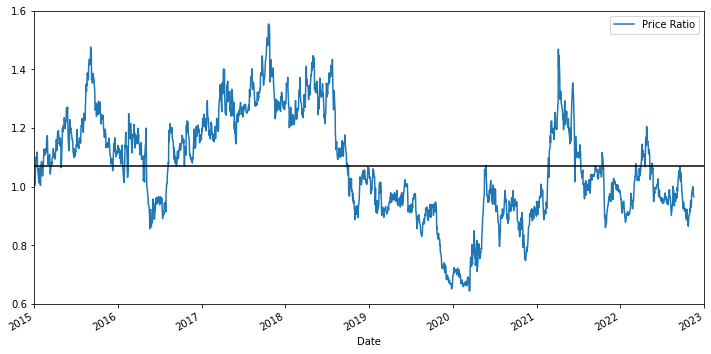

In [110]:
ratio1 = S1/S2
ratio1.plot(figsize=(12,6))
plt.axhline(ratio1.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

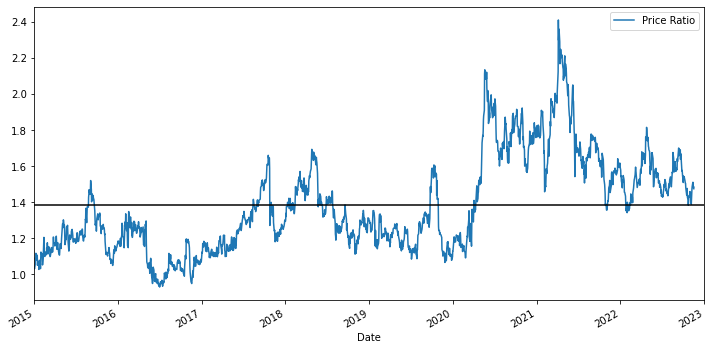

In [111]:
ratio2 = S3/S4
ratio2.plot(figsize=(12,6))
plt.axhline(ratio2.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

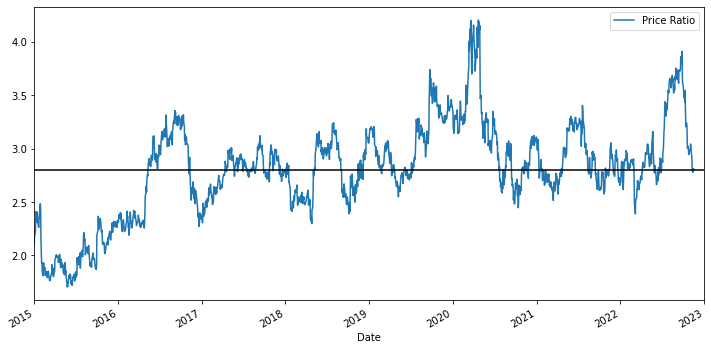

In [112]:
ratio3 = S5/S6
ratio3.plot(figsize=(12,6))
plt.axhline(ratio3.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

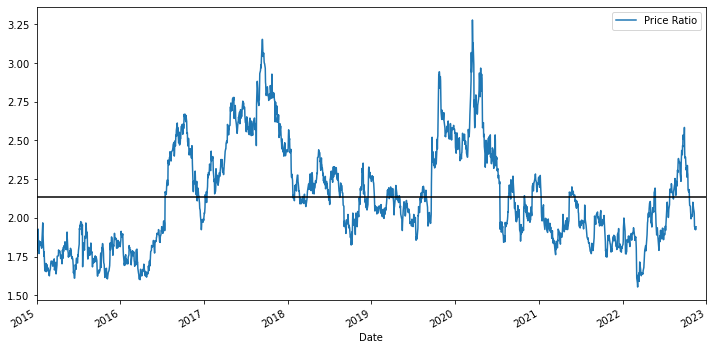

In [113]:
ratio4 = S7/S8
ratio4.plot(figsize=(12,6))
plt.axhline(ratio4.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

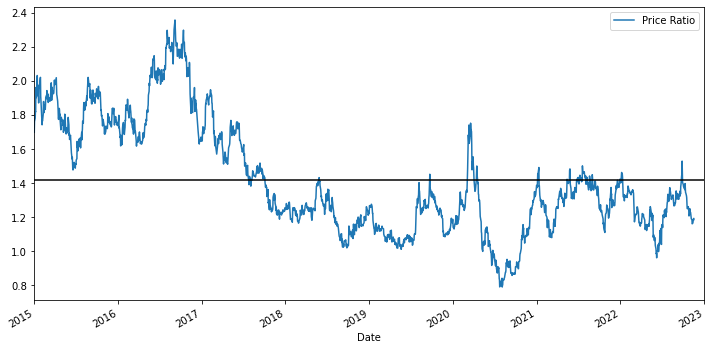

In [114]:
ratio5 = S9/S10
ratio5.plot(figsize=(12,6))
plt.axhline(ratio5.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

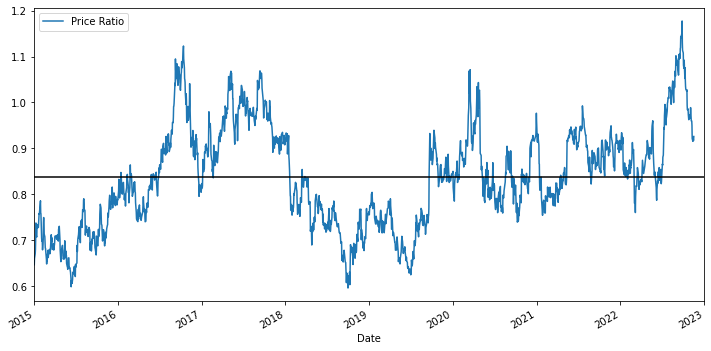

In [115]:
ratio6 = S11/S12
ratio6.plot(figsize=(12,6))
plt.axhline(ratio6.mean(), color='black')
plt.xlim('2015-01-01', '2023-01-01')
plt.legend(['Price Ratio']);

We can see from above spread graphs using price ratio of our pairs that the soread tends to move around the mean price ratio. We now need to standardize this ratio because the absolute ratio might not be the most ideal way of analyzing this trend. For this, we need to use z-scores.

A z-score is the number of standard deviations a datapoint is from the mean. More importantly, the nmber of standard deviations above or below the population mean is from the raw score. The z-score is calculated by the follow:

$  \Large {z_i} = \frac{x_i  -  \overline x} {s} $

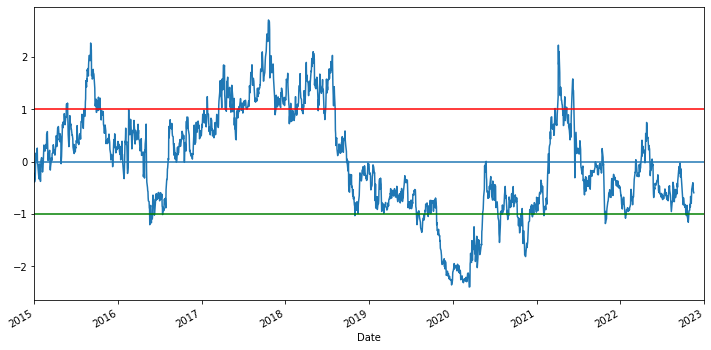

In [116]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio1).plot(figsize=(12,6))
plt.axhline(zscore(ratio1).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

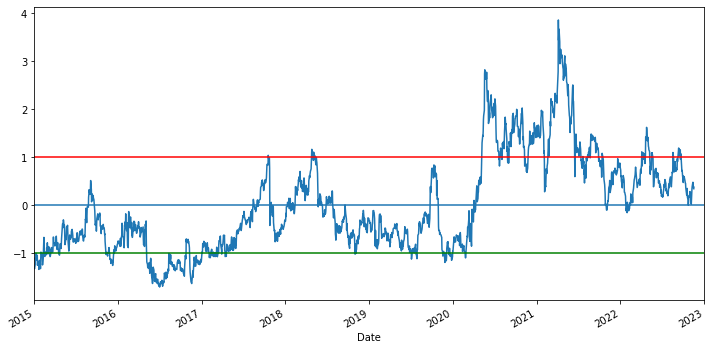

In [117]:
zscore(ratio2).plot(figsize=(12,6))
plt.axhline(zscore(ratio2).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

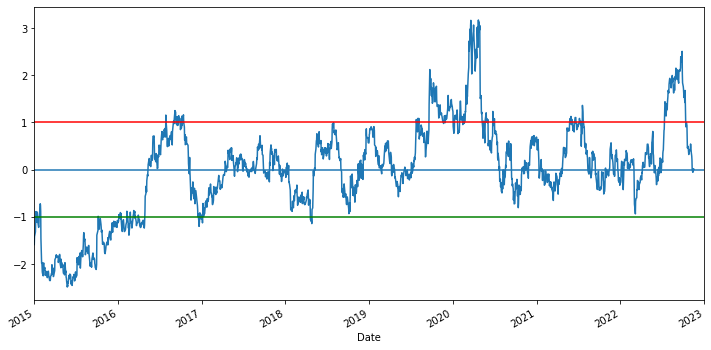

In [118]:
zscore(ratio3).plot(figsize=(12,6))
plt.axhline(zscore(ratio3).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

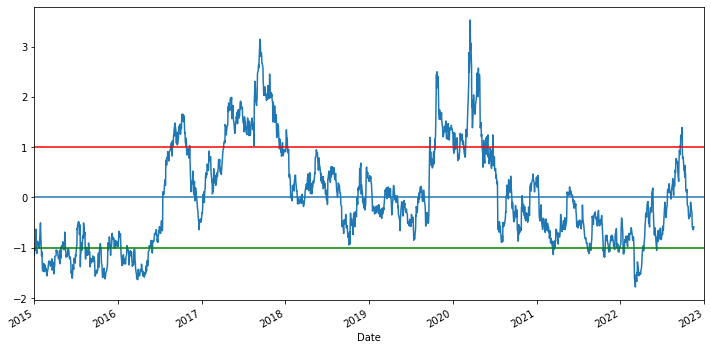

In [119]:
zscore(ratio4).plot(figsize=(12,6))
plt.axhline(zscore(ratio4).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

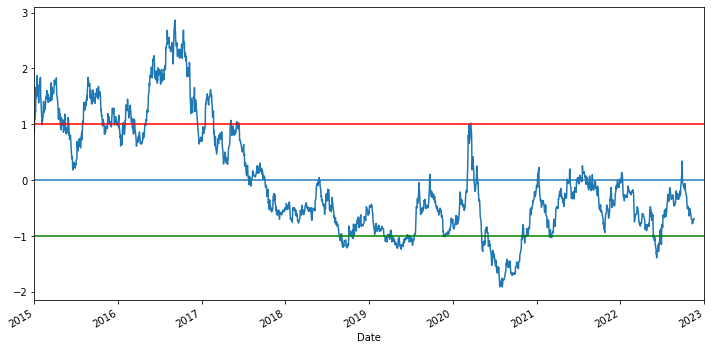

In [120]:
zscore(ratio5).plot(figsize=(12,6))
plt.axhline(zscore(ratio5).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

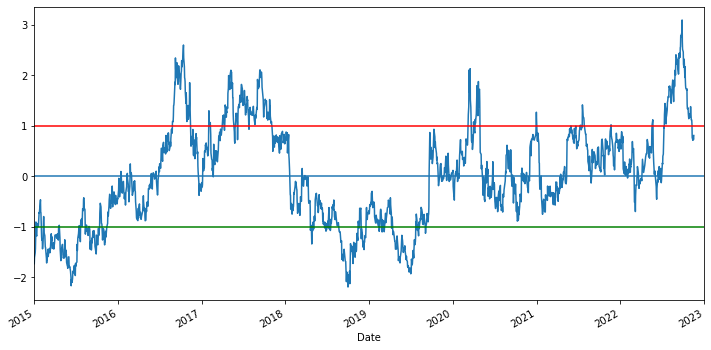

In [121]:
zscore(ratio6).plot(figsize=(12,6))
plt.axhline(zscore(ratio6).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-01-01', '2023-01-01')
plt.show()

By setting two other lines placed at the z-score of 1 and -1, we can clearly see that for the most part, any big divergences from the mean eventually converges back. This is exactly what we want for a pairs trading strategy.

## Trading Signals

### Setup rules
We're going to use the ratio time series that we've created to see if it tells us whether to buy or sell a particular moment in time. We'll start off by creating a prediction variable $ Y $ . If the ratio is positive, it will signal a "buy," otherwise, it will signal a sell. The prediction model is as follows:

$ Y_t = sign ( Ratio_{t+1} - Ratio_{t}) $

What's great about pair trading signals is that we don't need to know absolutes about where the prices will go, all we need to know is where it's heading: up or down.


#### Train Test Split:

In [122]:
print(len(ratio1) * .70 ) 

1362.1999999999998


In [123]:
train= ratio1[:1362]
test = ratio1[1362:]

### Feature Engineering

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

- 60 day Moving Average of Ratio
- 5 day Moving Average of Ratio
- 60 day Standard Deviation
- z score

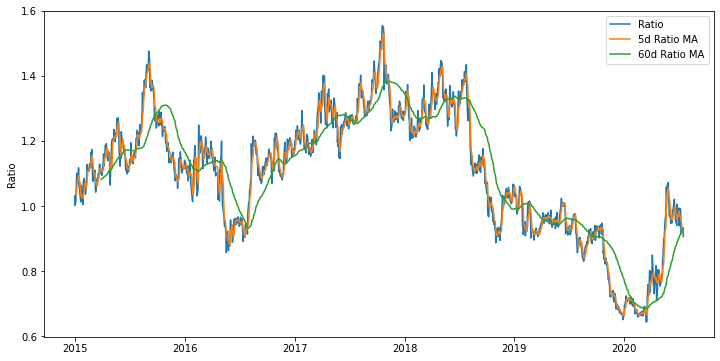

In [124]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

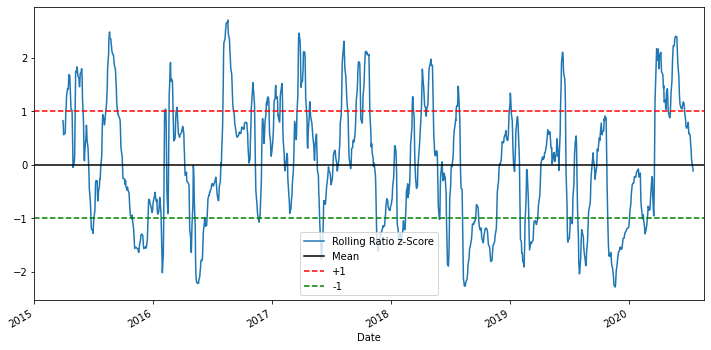

In [125]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2015-01-01', '2020-08-17')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

### Creating a Model

A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:

- Buy(1) whenever the z-score is below -1, meaning we expect the ratio to increase.
- Sell(-1) whenever the z-score is above 1, meaning we expect the ratio to decrease.

#### Training Optimizing

We can use our model on actual data

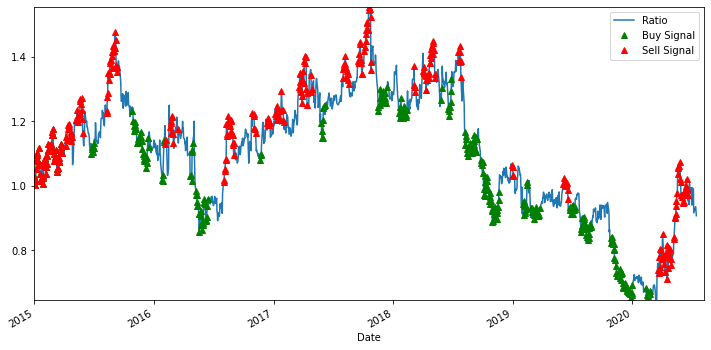

In [126]:
plt.figure(figsize=(12,6))

train[:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[:].plot(color='g', linestyle='None', marker='^')
sell[:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio1.min(), ratio1.max()))
plt.xlim('2015-01-01','2020-08-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

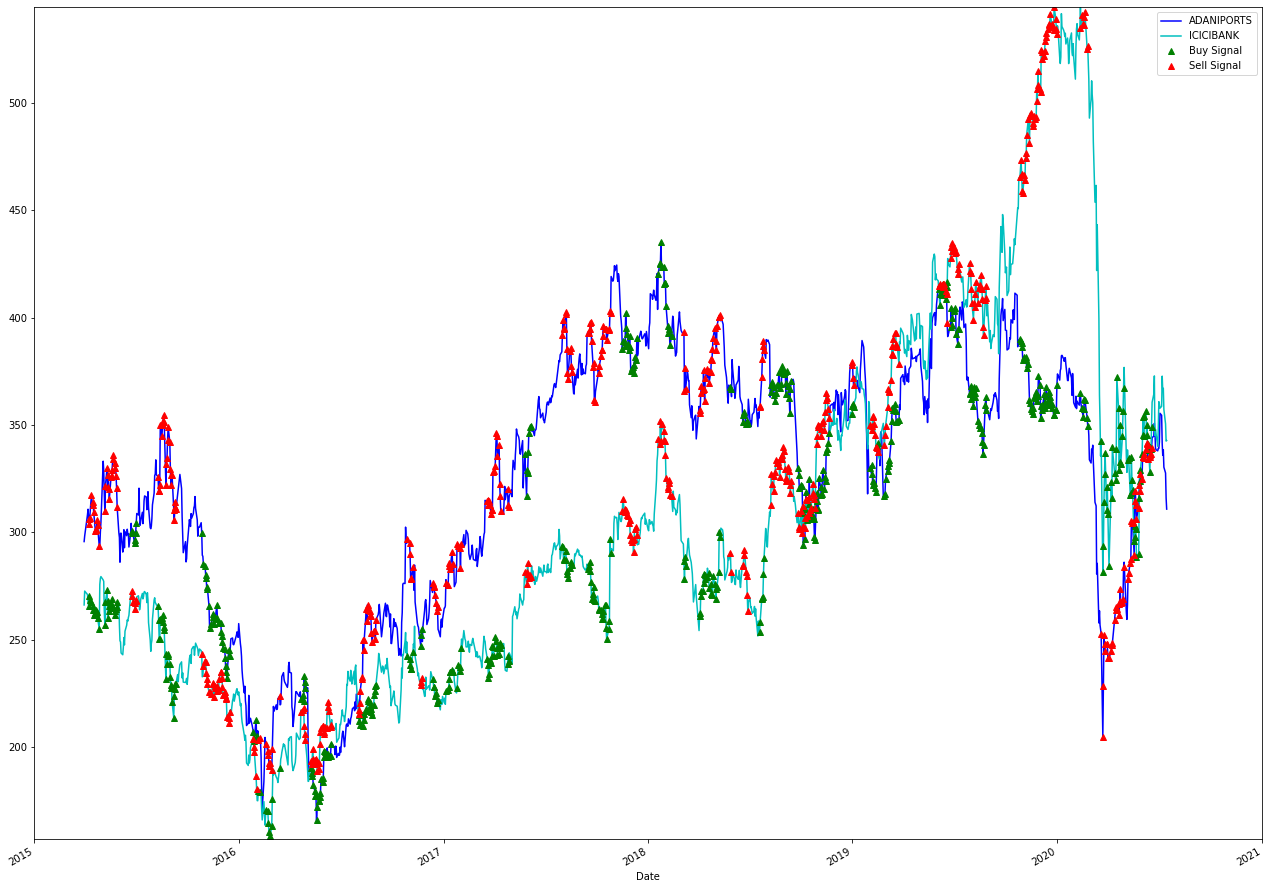

In [128]:
plt.figure(figsize=(22,17))
S1 = dataset['ADANIPORTS.NS'].iloc[:1362]
S2 = dataset['ICICIBANK.NS'].iloc[:1362]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
#plt.ylim(25, 105)
plt.xlim('2015-01-01', '2021-01-01')

plt.legend(['ADANIPORTS', 'ICICIBANK', 'Buy Signal', 'Sell Signal'])
plt.show()


In [129]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [136]:
trade(dataset['ADANIPORTS.NS'].iloc[1362:], dataset['ICICIBANK.NS'].iloc[1362:], 60, 5)

11379.124231369524

We made a profit of INR 11379.12 which is not bad. Now we will repeat this process for all the other clusters we found earlier.

In [131]:
train= ratio2[:1362]
test = ratio2[1362:]

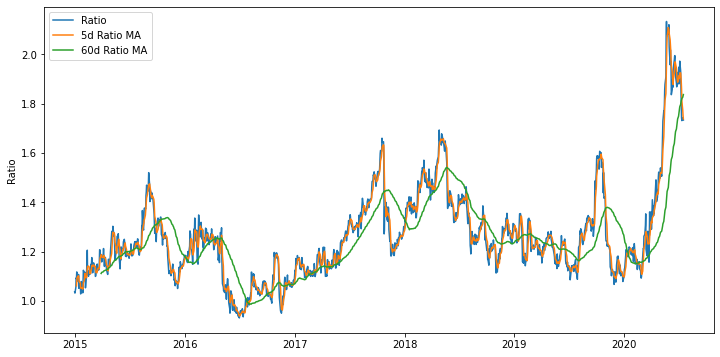

In [132]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

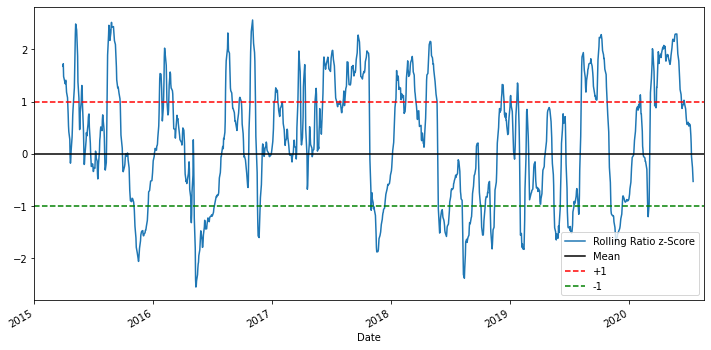

In [133]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2015-01-01', '2020-08-17')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

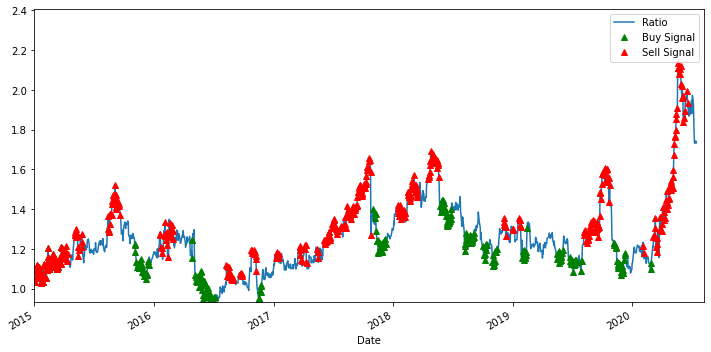

In [134]:
plt.figure(figsize=(12,6))

train[:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[:].plot(color='g', linestyle='None', marker='^')
sell[:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio2.min(), ratio2.max()))
plt.xlim('2015-01-01','2020-08-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

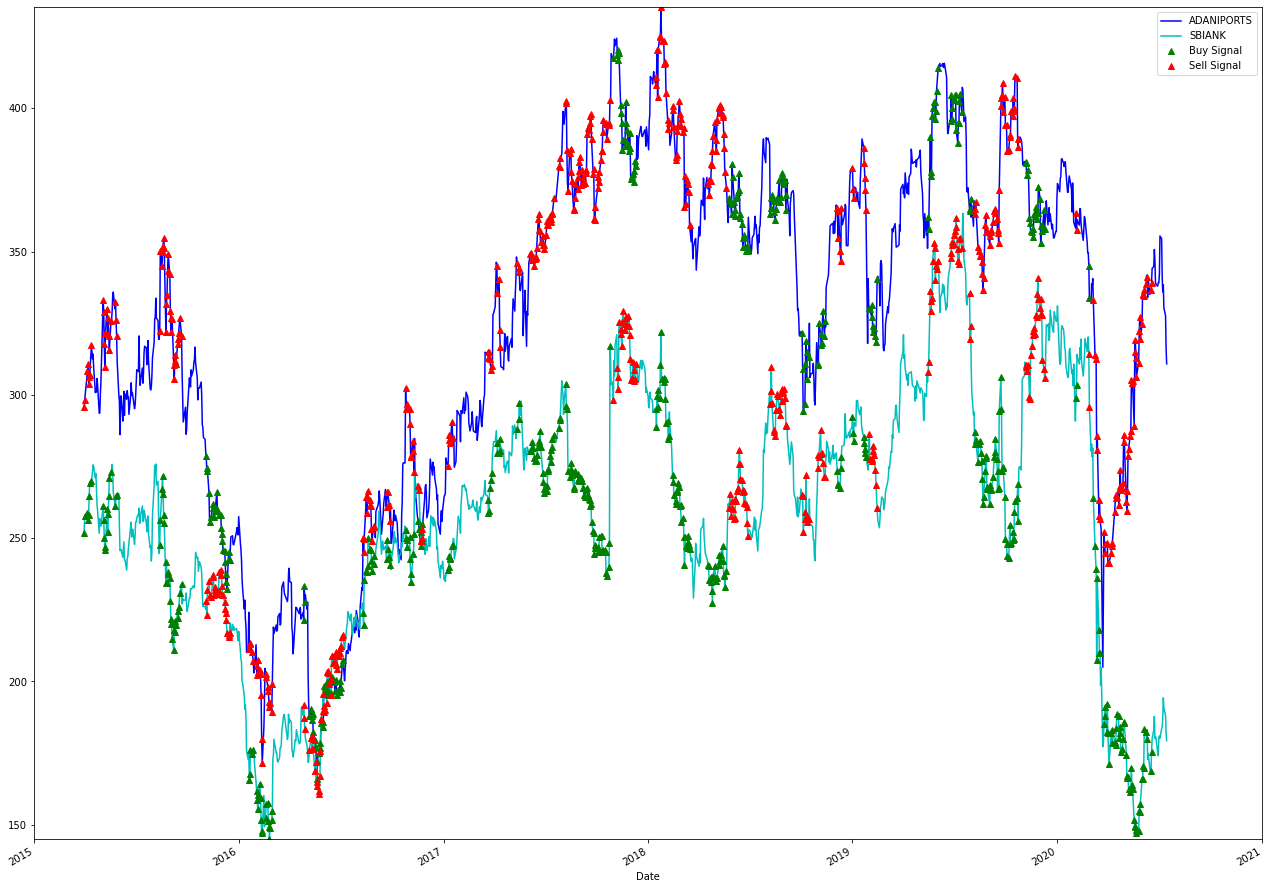

In [135]:
plt.figure(figsize=(22,17))
S1 = dataset['ADANIPORTS.NS'].iloc[:1362]
S2 = dataset['SBIN.NS'].iloc[:1362]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
#plt.ylim(25, 105)
plt.xlim('2015-01-01', '2021-01-01')

plt.legend(['ADANIPORTS', 'SBIANK', 'Buy Signal', 'Sell Signal'])
plt.show()

In [137]:
trade(dataset['ADANIPORTS.NS'].iloc[1362:], dataset['SBIN.NS'].iloc[1362:], 60, 5)

13085.986937989714

In [138]:
train= ratio3[:1362]
test = ratio3[1362:]

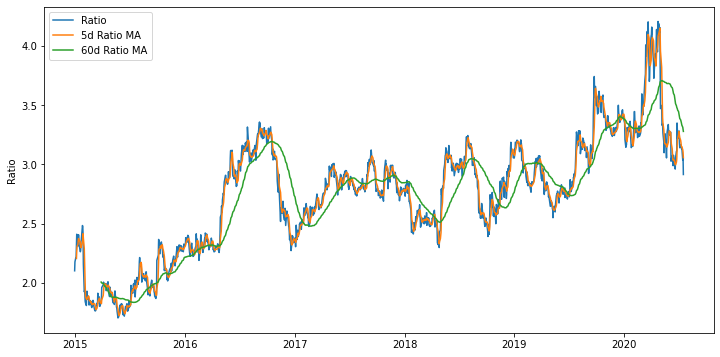

In [139]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

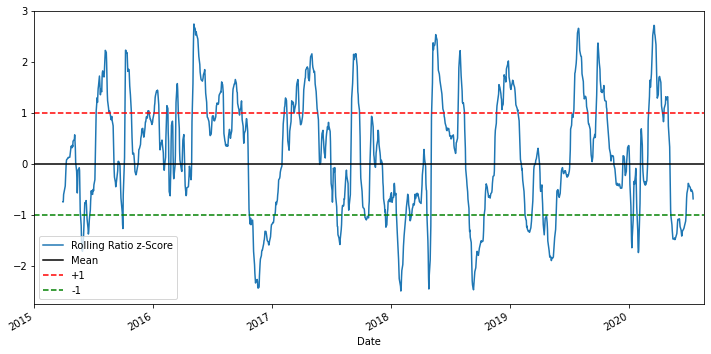

In [140]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2015-01-01', '2020-08-17')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

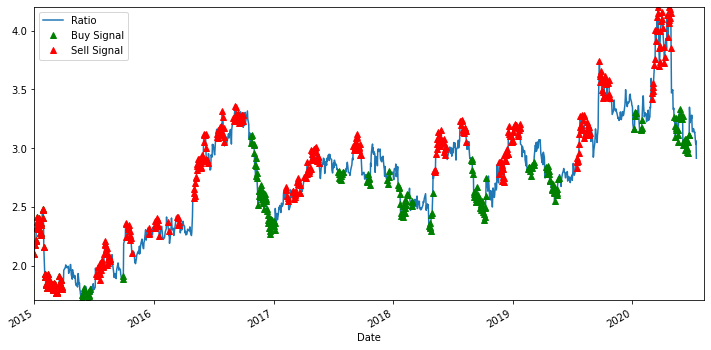

In [141]:
plt.figure(figsize=(12,6))

train[:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[:].plot(color='g', linestyle='None', marker='^')
sell[:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio3.min(), ratio3.max()))
plt.xlim('2015-01-01','2020-08-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

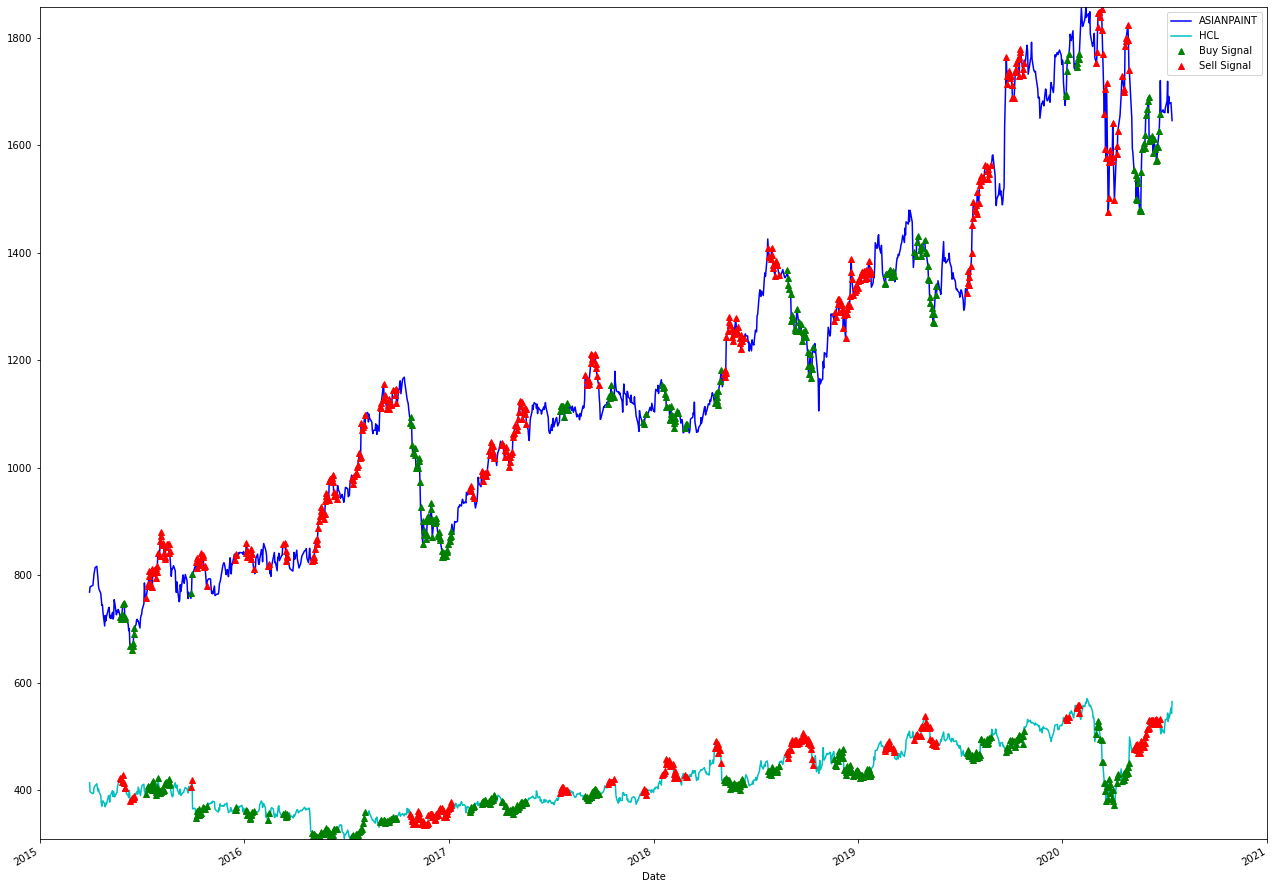

In [142]:
plt.figure(figsize=(22,17))
S1 = dataset['ASIANPAINT.NS'].iloc[:1362]
S2 = dataset['HCLTECH.NS'].iloc[:1362]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
#plt.ylim(25, 105)
plt.xlim('2015-01-01', '2021-01-01')

plt.legend(['ASIANPAINT', 'HCL', 'Buy Signal', 'Sell Signal'])
plt.show()

In [143]:
trade(dataset['ASIANPAINT.NS'].iloc[1362:], dataset['HCLTECH.NS'].iloc[1362:], 60, 5)

42776.52144451966

In [144]:
train= ratio4[:1362]
test = ratio4[1362:]

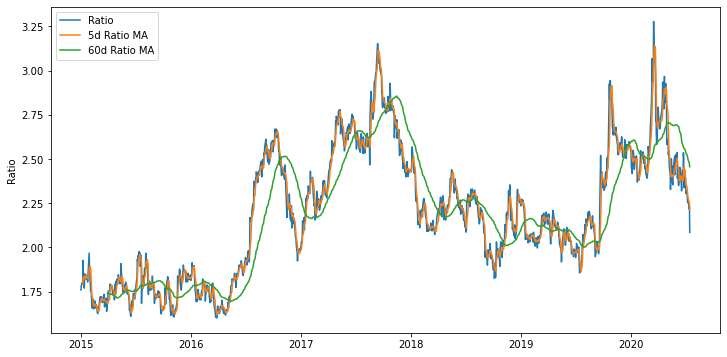

In [145]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

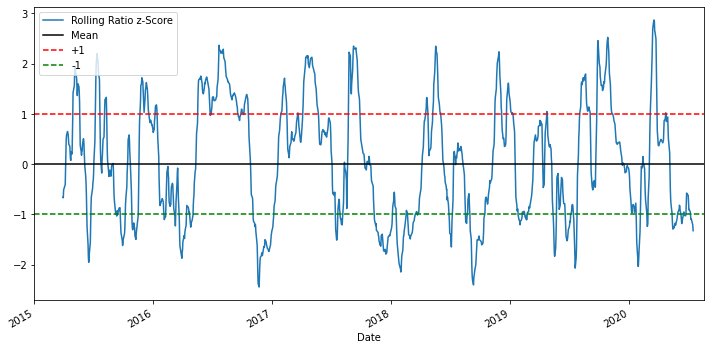

In [146]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2015-01-01', '2020-08-17')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

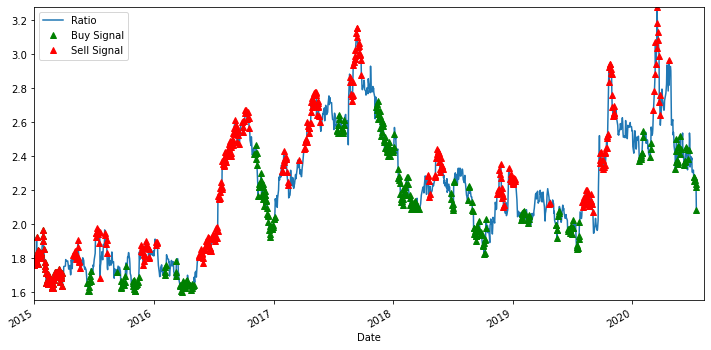

In [147]:
plt.figure(figsize=(12,6))

train[:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[:].plot(color='g', linestyle='None', marker='^')
sell[:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio4.min(), ratio4.max()))
plt.xlim('2015-01-01','2020-08-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

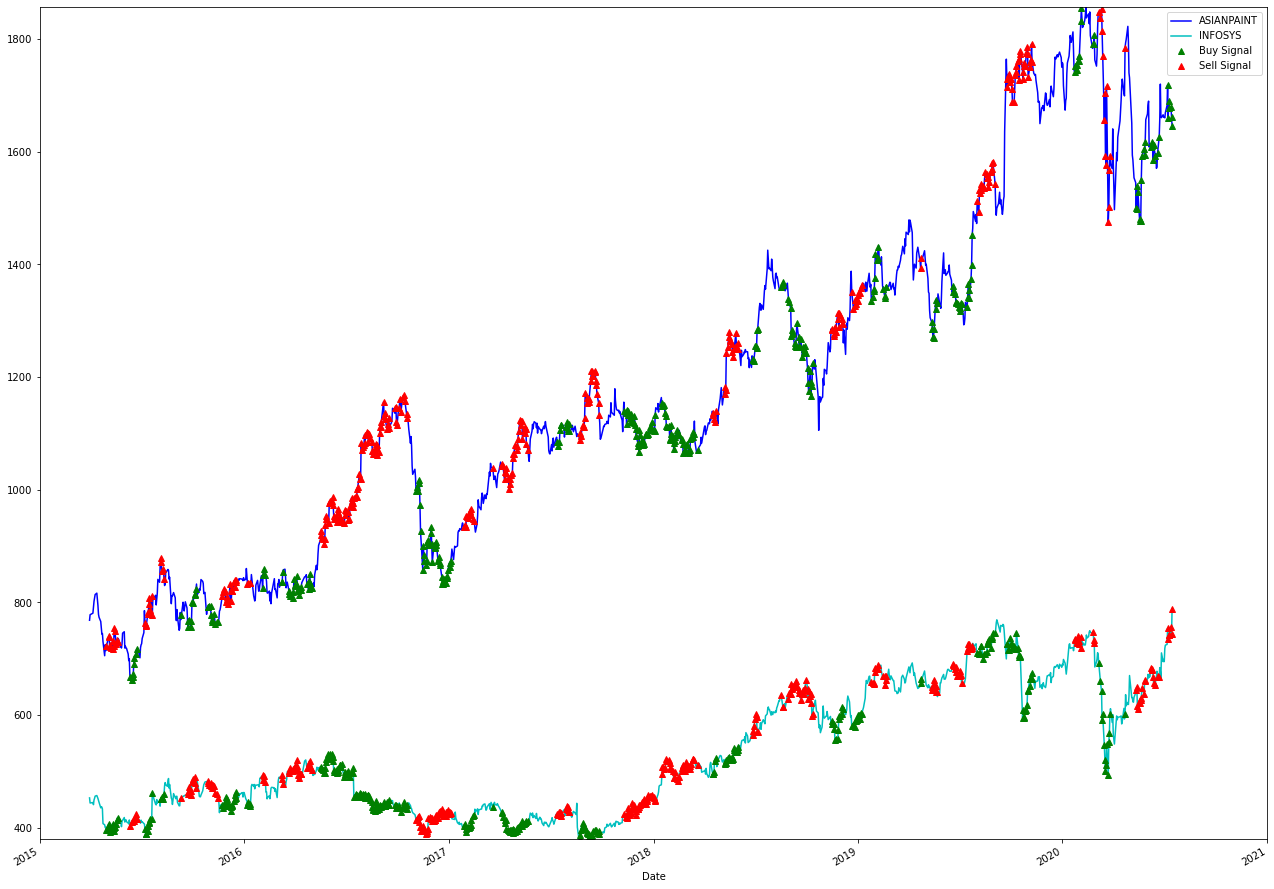

In [148]:
plt.figure(figsize=(22,17))
S1 = dataset['ASIANPAINT.NS'].iloc[:1362]
S2 = dataset['INFY.NS'].iloc[:1362]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
#plt.ylim(25, 105)
plt.xlim('2015-01-01', '2021-01-01')

plt.legend(['ASIANPAINT', 'INFOSYS', 'Buy Signal', 'Sell Signal'])
plt.show()

In [149]:
trade(dataset['ASIANPAINT.NS'].iloc[1362:], dataset['INFY.NS'].iloc[1362:], 60, 5)

69451.6393185648

In [150]:
train= ratio5[:1362]
test = ratio5[1362:]

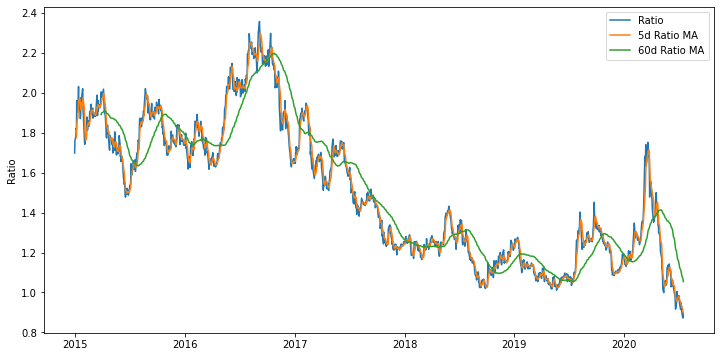

In [151]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

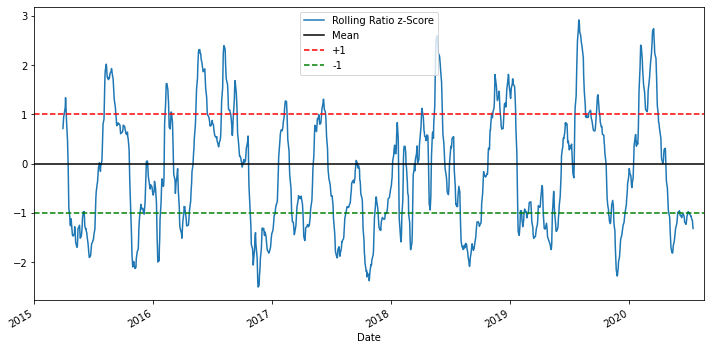

In [152]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2015-01-01', '2020-08-17')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

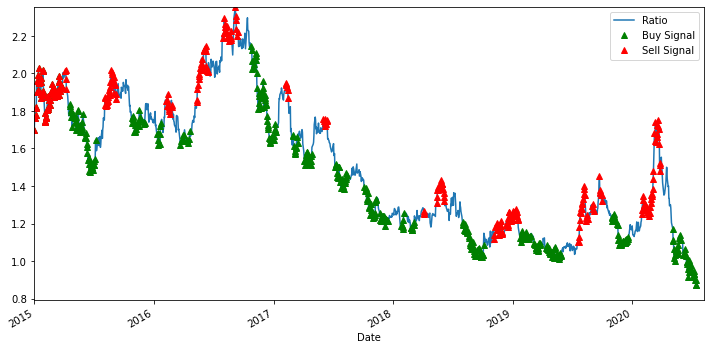

In [153]:
plt.figure(figsize=(12,6))

train[:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[:].plot(color='g', linestyle='None', marker='^')
sell[:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio5.min(), ratio5.max()))
plt.xlim('2015-01-01','2020-08-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

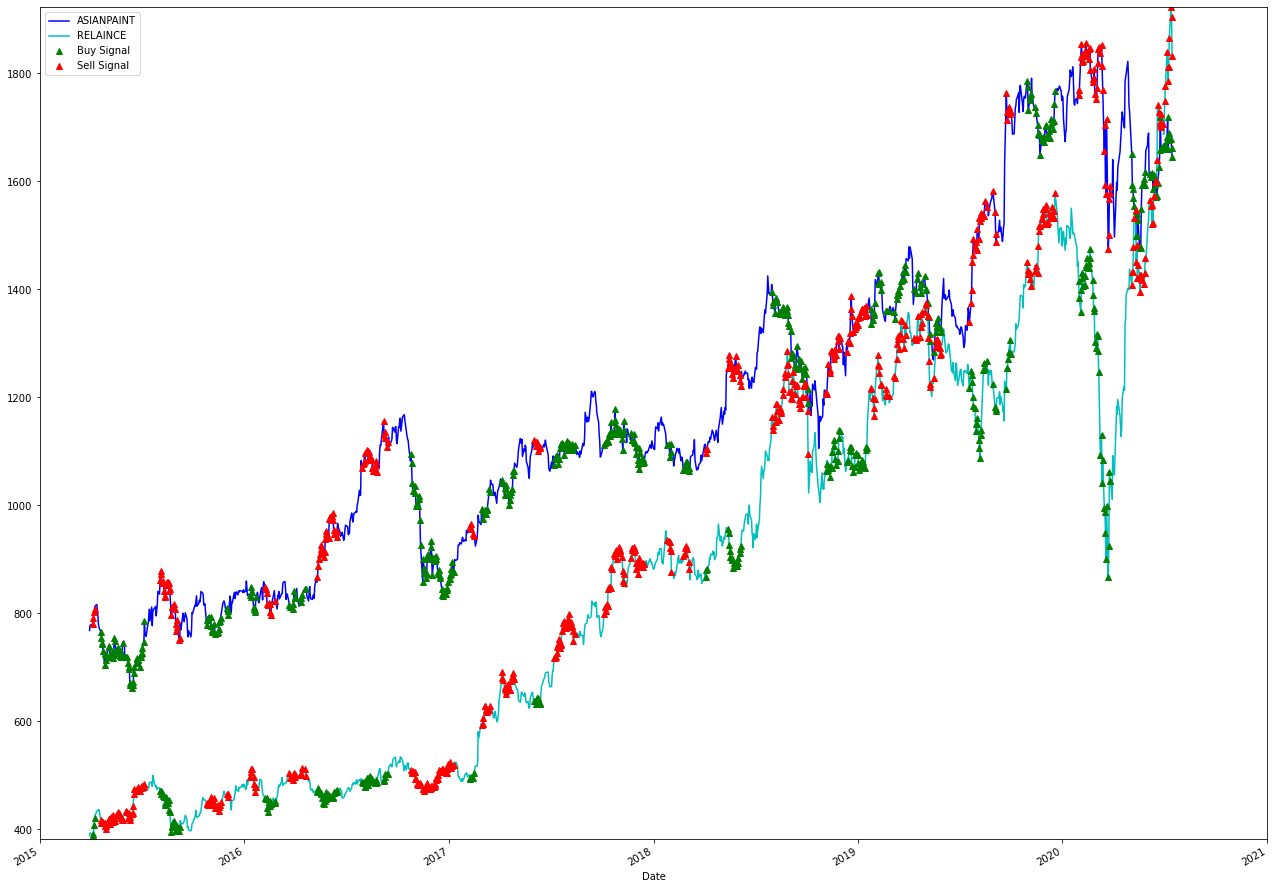

In [154]:
plt.figure(figsize=(22,17))
S1 = dataset['ASIANPAINT.NS'].iloc[:1362]
S2 = dataset['RELIANCE.NS'].iloc[:1362]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
#plt.ylim(25, 105)
plt.xlim('2015-01-01', '2021-01-01')

plt.legend(['ASIANPAINT', 'RELAINCE', 'Buy Signal', 'Sell Signal'])
plt.show()

In [155]:
trade(dataset['ASIANPAINT.NS'].iloc[1362:], dataset['RELIANCE.NS'].iloc[1362:], 60, 5)

22860.24470846558

In [156]:
trade(dataset['ASIANPAINT.NS'].iloc[1362:], dataset['TCS.NS'].iloc[1362:], 60, 5)

38087.065167473185

## Conclusion:

Clustering can effectively be used for dividing stocks into groups with “similar characteristics” for many other kinds of trading strategies and can help in portfolio construction to ensure we choose a universe of stocks with sufficient diversification between them. The clusters where very diverse and not concentrated in the industries as the common logic would dictate. The clusters ranged from industrial firms to banking and IT. Then we showed how these clusters perform pretty well for pairs trading as each pairs that the Kmean algorithim produced generated a good profit when backtested. 

## Areas of Improvement and Further Steps
This is by no means a perfect strategy and the implementation of our strategy isn't the best. However, there are several things that can be improved upon. We first need to improve our code for Affinity propogation clustering as it didn't work on that dataset used in this file. Apart from that we can also improve our trading strategy by:

1. **Using more securities and more varied time ranges**

For the pairs trading strategy cointegration test, I only used a 50 stocks. I only use the time range of only 5 years, which may not be representative of stock market volatility.

2. **Dealing with overfitting**

Anything related to data analysis and training models has much to do with the problem of overfitting. There are many different ways to deal with overfitting like validation, such as Kalman filters, and other statistical methods.

3. **Adjusting the trading signals**

Our trading algorithm fails to account for stock prices that overlap and cross each other. Considering that the code only calls for a buy or sell given its ratio, it doesn't take into account which stock is actually higher or lower.

4. **More advanced methods**

This is just the tip of the iceberg of what you can do with algorithmic pairs trading. It's simple because it only deals with moving averages and ratios. If you want to use more complicated statistics, feel free to do so. Other complex examples include subjects such as the Hurst exponent, half-life mean reversion, and Kalman Filters.